<a href="https://colab.research.google.com/github/MRAMIRE/Tesis_Modelo_Deep_Learning_USA/blob/master/2_Visualizaci%C3%B3n_de_la_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **VISUALIZACIÓN DE LA DATA:**

###FELIPE ANTONIO MELO CIFUENTES

###MARIA CAMILA RAMIREZ FERRO




##### Clonación de repositorio github

In [0]:
import os
if os.path.exists('Tesis_Modelo_Deep_Learning_USA/'):
  !git -C Tesis_Modelo_Deep_Learning_USA/ fetch --all
  !git -C Tesis_Modelo_Deep_Learning_USA/ reset --hard origin/master
  !git -C Tesis_Modelo_Deep_Learning_USA/ pull origin master;
else:
  !git clone https://github.com/MRAMIRE/Tesis_Modelo_Deep_Learning_USA.git
%cd Tesis_Modelo_Deep_Learning_USA/
from utils import *

Cloning into 'Tesis_Modelo_Deep_Learning_USA'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 281 (delta 48), reused 56 (delta 22), pack-reused 189
Receiving objects: 100% (281/281), 1.77 MiB | 29.21 MiB/s, done.
Resolving deltas: 100% (134/134), done.
/content/Tesis_Modelo_Deep_Learning_USA


##### Permisos y cambio de directorio:

In [0]:
from google.colab import drive
#Permisos
drive.mount('/gdrive')

#Cambio de Directorio
%cd /gdrive/My\ Drive/Tesis
%ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive/My Drive/Tesis
'1. Exploración de los Datos'                           'Prueba red.ipynb'
'2. Visualización de la Data.ipynb'                      runs/
'3. Pre-PorcesamientoV2-Data.Pre-PorcesamientoV2-Data'   sample_submission.csv
'4. Data Set.ipynb'                                      set_test.csv
'5. Entrenamiento'                                       set_train.csv
'6. Resultados'                                          test_images/
 checkpoints/     

#####Importar librerias:

In [0]:
import cv2
import numpy as np
import matplotlib
import pylab as plt
from torch.utils.data import Dataset, DataLoader
import torch
from torchvision import transforms, utils
import pandas as pd
from skimage import io, transform
%matplotlib inline

import requests
from PIL import Image, ImageDraw, ImageFont



import random
import colorsys



#####Lectura del csv train:

In [0]:
# Creación de la variable df_train
df_train = pd.read_csv('train.csv')

# Muesta los primeros registros de df_train
print(df_train.shape)
df_train.head()

(22184, 2)


,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg_Gravel,NaN
3,0011165.jpg_Sugar,NaN
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...


##### Creación de un nuevo df_train:

In [0]:
#Antes de correr (ctrl+F8)
df_split = df_train["Image_Label"].str.split("_", n = 1, expand = True)
df_train['Image_Label']= df_split[0]
df_train['Label']=df_split[1]
df_train.columns = ['Id','EncodedPixels','Label']
df_train = df_train.fillna('-1')
df_train.head()

,Id,EncodedPixels,Label
0,0011165.jpg,264918 937 266318 937 267718 937 269118 937 27...,Fish
1,0011165.jpg,1355565 1002 1356965 1002 1358365 1002 1359765...,Flower
2,0011165.jpg,-1,Gravel
3,0011165.jpg,-1,Sugar
4,002be4f.jpg,233813 878 235213 878 236613 878 238010 881 23...,Fish


##### Visualización de las mascaras:

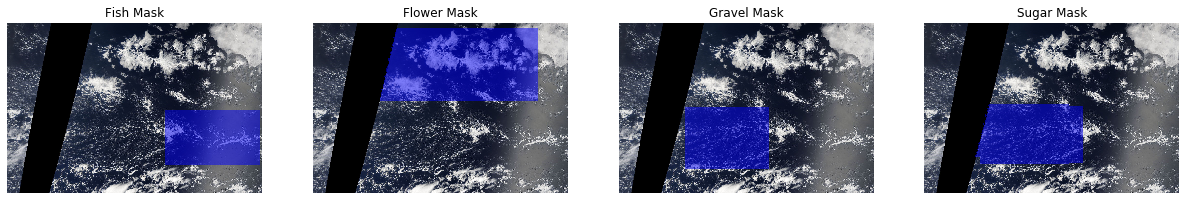

In [0]:
#image = random.choice(df_train['Id'])
image = '8242ba0.jpg'
root = './train_images/'
masks = get_mask(image,df_train)
plot_img_masks(image,masks,root)

##### Basura varia

In [0]:
rutaTrI = './train_images'
rutaTsI = './test_images'
train_files = os.listdir(rutaTrI)
test_files = os.listdir(rutaTsI)
train_files[0:9]
#train_files.index('0011165.jpg')

['d22eb33.jpg',
 'd239cc1.jpg',
 'd24e67f.jpg',
 'd25d1fb.jpg',
 'd265d38.jpg',
 'd27e37b.jpg',
 'd29a30a.jpg',
 'd2a42ee.jpg',
 'd2a540d.jpg']